In [ ]:
pip install transformers


In [ ]:
import numpy as np

# Giving sentence pair/corpus
sentence_pairs = {
    "Short vs. Long Sentences": [
        ("The cat is sleeping.", "The dog is barking."),
        ("The sun was setting behind the mountains, casting a golden hue across the tranquil lake as the birds chirped in the surrounding trees.",
         "The city streets were bustling with activity as people hurriedly made their way to work amidst the honking of cars and the chatter of pedestrians.")
    ],
    "Simple vs. Complex Syntax": [
        ("She walked to the store.", "He likes ice cream."),
        ("After the rain stopped, the rainbow appeared in the sky, arching gracefully over the horizon, filling the air with colors.",
         "Despite his reluctance, John decided to accept the challenge, knowing that it would push him out of his comfort zone.")
    ],
    "Semantically Similar vs. Dissimilar Pairs": [
        ("The cat is sleeping.", "The cat is napping."),
        ("The sun is shining brightly in the sky.", "The moon is visible in the night sky.")
    ],
    "Paraphrase vs. Non-Paraphrase": [
        ("She enjoys reading books.", "She loves to read novels."),
        ("The flowers are blooming in the garden.", "The car is parked in the driveway.")
    ],
    "Cross-genre or Cross-domain Data": [
        ("The government announced new tax reforms.", "Have you heard about the latest tax changes? #taxreform #government"),
        ("The patient's condition improved after the surgery.", "The judge issued a verdict in favor of the defendant.")
    ]
}


In [ ]:
from transformers import AutoTokenizer, AutoModel

model_names = ["bert-base-uncased", "roberta-base", "distilbert-base-uncased", "xlnet-base-cased", "albert-base-v2"]

models = {}

for model_name in model_names:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    models[model_name] = (tokenizer, model)

for model_name, (tokenizer, model) in models.items():
    print(f"Loaded {model_name} tokenizer and model.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Loaded bert-base-uncased tokenizer and model.
Loaded roberta-base tokenizer and model.
Loaded distilbert-base-uncased tokenizer and model.
Loaded xlnet-base-cased tokenizer and model.
Loaded albert-base-v2 tokenizer and model.


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
from scipy.spatial.distance import cosine
import numpy as np

#I have used 5 models for finding text sentence similarity
model_names = ["bert-base-uncased", "roberta-base", "distilbert-base-uncased", "xlnet-base-cased", "albert-base-v2"]
models = {model_name: (AutoTokenizer.from_pretrained(model_name), AutoModel.from_pretrained(model_name)) for model_name in model_names}


def calculate_length_similarity(model, tokenizer, sentence1, sentence2):

    inputs1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)
    inputs2 = tokenizer(sentence2, return_tensors="pt", padding=True, truncation=True)


    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)


    embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze()
    embedding2 = outputs2.last_hidden_state.mean(dim=1).squeeze()
    similarity_score = 1 - cosine(embedding1, embedding2)
    return similarity_score

# Define function to calculate similarity score for syntactic complexity
def calculate_syntax_similarity(model, tokenizer, sentence1, sentence2):
    # Tokenize the input sentences
    inputs1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)
    inputs2 = tokenizer(sentence2, return_tensors="pt", padding=True, truncation=True)

    # Pass the tokenized inputs through the model
    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    # Calculate cosine similarity between the mean pooled embeddings of the sentences
    embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze()
    embedding2 = outputs2.last_hidden_state.mean(dim=1).squeeze()
    similarity_score = 1 - cosine(embedding1, embedding2)
    return similarity_score

# Define function to calculate similarity score for semantic similarity
def calculate_semantic_similarity(model, tokenizer, sentence1, sentence2):
    # Tokenize the input sentences
    inputs1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)
    inputs2 = tokenizer(sentence2, return_tensors="pt", padding=True, truncation=True)

    # Pass the tokenized inputs through the model
    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    # Calculate cosine similarity between the mean pooled embeddings of the sentences
    embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze()
    embedding2 = outputs2.last_hidden_state.mean(dim=1).squeeze()
    similarity_score = 1 - cosine(embedding1, embedding2)
    return similarity_score

# Define function to calculate similarity score for paraphrase identification
def calculate_paraphrase_similarity(model, tokenizer, sentence1, sentence2):
    # Tokenize the input sentences
    inputs1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)
    inputs2 = tokenizer(sentence2, return_tensors="pt", padding=True, truncation=True)

    # Pass the tokenized inputs through the model
    with torch.no_grad():
        outputs1 = model(**inputs1)
        outputs2 = model(**inputs2)

    # Calculate cosine similarity between the mean pooled embeddings of the sentences
    embedding1 = outputs1.last_hidden_state.mean(dim=1).squeeze()
    embedding2 = outputs2.last_hidden_state.mean(dim=1).squeeze()
    similarity_score = 1 - cosine(embedding1, embedding2)
    return similarity_score


sentence_pairs = {
    "Short vs. Long Sentences": [
        ("The cat is sleeping.", "The dog is barking."),
        ("The sun was setting behind the mountains, casting a golden hue across the tranquil lake as the birds chirped in the surrounding trees.",
         "The city streets were bustling with activity as people hurriedly made their way to work amidst the honking of cars and the chatter of pedestrians.")
    ],
    "Simple vs. Complex Syntax": [
        ("She walked to the store.", "He likes ice cream."),
        ("After the rain stopped, the rainbow appeared in the sky, arching gracefully over the horizon, filling the air with colors.",
         "Despite his reluctance, John decided to accept the challenge, knowing that it would push him out of his comfort zone.")
    ],
    "Semantically Similar vs. Dissimilar Pairs": [
        ("The cat is sleeping.", "The cat is napping."),
        ("The sun is shining brightly in the sky.", "The moon is visible in the night sky.")
    ],
    "Paraphrase vs. Non-Paraphrase": [
        ("She enjoys reading books.", "She loves to read novels."),
        ("The flowers are blooming in the garden.", "The car is parked in the driveway.")
    ]
}

# Calculate similarity scores for each sentence pair and parameter
for parameter, pairs in sentence_pairs.items():
    print(f"Parameter: {parameter}")
    for model_name, (tokenizer, model) in models.items():
        print(f"Model: {model_name}")
        similarity_scores = []
        for sentence1, sentence2 in pairs:
            if parameter == "Short vs. Long Sentences":
                score = calculate_length_similarity(model, tokenizer, sentence1, sentence2)
            elif parameter == "Simple vs. Complex Syntax":
                score = calculate_syntax_similarity(model, tokenizer, sentence1, sentence2)
            elif parameter == "Semantically Similar vs. Dissimilar Pairs":
                score = calculate_semantic_similarity(model, tokenizer, sentence1, sentence2)
            elif parameter == "Paraphrase vs. Non-Paraphrase":
                score = calculate_paraphrase_similarity(model, tokenizer, sentence1, sentence2)
            similarity_scores.append(score)
        print("Similarity Scores:", similarity_scores)
    print()


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Parameter: Short vs. Long Sentences
Model: bert-base-uncased
Similarity Scores: [0.8438580632209778, 0.7599101662635803]
Model: roberta-base
Similarity Scores: [0.9927566051483154, 0.9777578711509705]
Model: distilbert-base-uncased


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Similarity Scores: [0.9299212694168091, 0.7872766852378845]
Model: xlnet-base-cased
Similarity Scores: [0.9826397895812988, 0.9567590951919556]
Model: albert-base-v2
Similarity Scores: [0.9448533654212952, 0.8735564947128296]

Parameter: Simple vs. Complex Syntax
Model: bert-base-uncased
Similarity Scores: [0.5309853553771973, 0.6213627457618713]
Model: roberta-base
Similarity Scores: [0.9689061045646667, 0.9717764258384705]
Model: distilbert-base-uncased
Similarity Scores: [0.7265068292617798, 0.6924452781677246]
Model: xlnet-base-cased
Similarity Scores: [0.9671744108200073, 0.9416648745536804]
Model: albert-base-v2
Similarity Scores: [0.7565316557884216, 0.8510834574699402]

Parameter: Semantically Similar vs. Dissimilar Pairs
Model: bert-base-uncased
Similarity Scores: [0.9273804426193237, 0.867377519607544]
Model: roberta-base
Similarity Scores: [0.9961210489273071, 0.9861690998077393]
Model: distilbert-base-uncased
Similarity Scores: [0.9627715349197388, 0.8594073057174683]
Model

Finding the avg score

In [ ]:
# Calculate similarity scores for each sentence pair and parameter
for parameter, pairs in sentence_pairs.items():
    print(f"Parameter: {parameter}")
    for model_name, (tokenizer, model) in models.items():
        print(f"Model: {model_name}")
        similarity_scores = []
        for sentence1, sentence2 in pairs:
            if parameter == "Short vs. Long Sentences":
                score = calculate_length_similarity(model, tokenizer, sentence1, sentence2)
            elif parameter == "Simple vs. Complex Syntax":
                score = calculate_syntax_similarity(model, tokenizer, sentence1, sentence2)
            elif parameter == "Semantically Similar vs. Dissimilar Pairs":
                score = calculate_semantic_similarity(model, tokenizer, sentence1, sentence2)
            elif parameter == "Paraphrase vs. Non-Paraphrase":
                score = calculate_paraphrase_similarity(model, tokenizer, sentence1, sentence2)
            similarity_scores.append(score)

        # Calculate the average similarity score
        average_score = np.mean(similarity_scores)
        print("Average Similarity Score:", average_score)
    print()

#I am taking the avg values

Parameter: Short vs. Long Sentences
Model: bert-base-uncased
Average Similarity Score: 0.801884114742279
Model: roberta-base
Average Similarity Score: 0.9852572381496429
Model: distilbert-base-uncased
Average Similarity Score: 0.8585989773273468
Model: xlnet-base-cased
Average Similarity Score: 0.9696994423866272
Model: albert-base-v2
Average Similarity Score: 0.9092049300670624

Parameter: Simple vs. Complex Syntax
Model: bert-base-uncased
Average Similarity Score: 0.5761740505695343
Model: roberta-base
Average Similarity Score: 0.9703412652015686
Model: distilbert-base-uncased
Average Similarity Score: 0.7094760537147522
Model: xlnet-base-cased
Average Similarity Score: 0.9544196426868439
Model: albert-base-v2
Average Similarity Score: 0.8038075566291809

Parameter: Semantically Similar vs. Dissimilar Pairs
Model: bert-base-uncased
Average Similarity Score: 0.8973789811134338
Model: roberta-base
Average Similarity Score: 0.9911450743675232
Model: distilbert-base-uncased
Average Simil

In [ ]:
import csv

# Define the data
data = [
    {"Text": "T1", "Model": "bert-base-uncased", "P1": 0.801887114742279, "P2": 0.7533758554458618, "P3": 0.8164360997672087, "P4": 0.6506192004089355},
    {"Text": " ", "Model": "roberta-base", "P1": 0.9852567770481155, "P2": 0.9773416489953995, "P3": 0.982266574025154, "P4": 0.9064098722639083},
    {"Text": " ", "Model": "distilbert-base-uncased", "P1": 0.8585989773273468, "P2": 0.7394769812028046, "P3": 0.8960894203186035, "P4": 0.7821040451526642},
    {"Text": " ", "Model": "xlnet-base-cased", "P1": 0.9689019026756287, "P2": 0.9492120978832245, "P3": 0.9766262173652649, "P4": 0.9744448068141937},
    {"Text": " ", "Model": "albert-base-v2", "P1": 0.9092041425704956, "P2": 0.8626614763736725, "P3": 0.9390076003074646, "P4": 0.8027613632087708}
]


file_path = "text_model_scores.csv"


fields = ["Text", "Model", "P1", "P2", "P3", "P4"]


with open(file_path, 'w', newline='') as csvfile:

    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()

    writer.writerows(data)

print("CSV file created successfully!")


CSV file created successfully!


In [42]:
import csv
import math

# Function to calculate normalized values
def normalize_data(data):
    normalized_data = {}
    for key in data[0].keys():
        if key not in ['Text', 'Model']:
            values = [row[key] for row in data]
            normalized_data[key] = [value / math.sqrt(sum([v**2 for v in values])) for value in values]
    return normalized_data

# Function to calculate weighted normalized values
def weighted_normalize_data(normalized_data, weights):
    weighted_normalized_data = {}
    for key in normalized_data.keys():
        if key not in ['Text', 'Model']:
            weighted_normalized_data[key] = [value * weight for value, weight in zip(normalized_data[key], weights)]
    return weighted_normalized_data

# Function to calculate positive and negative ideal solutions
def ideal_solutions(weighted_normalized_data, impacts):
    ideal_positive = {}
    ideal_negative = {}
    for key in weighted_normalized_data.keys():
        if key not in ['Text', 'Model']:
            if impacts[key] == '+':
                ideal_positive[key] = max(weighted_normalized_data[key])
                ideal_negative[key] = min(weighted_normalized_data[key])
            elif impacts[key] == '-':
                ideal_positive[key] = min(weighted_normalized_data[key])
                ideal_negative[key] = max(weighted_normalized_data[key])
    return ideal_positive, ideal_negative

# Function to calculate TOPSIS scores
def calculate_topsis(data_chunk):
    # Extract relevant data for calculations
    models = [row['Model'] for row in data_chunk]
    weights = [1, 1, 2, 2]  # Adjust weights according to your requirements
    impacts = {'P1': '-', 'P2': '-', 'P3': '+', 'P4': '+'}  # Adjust impacts according to your requirements

    # Calculate normalized values
    normalized_data = normalize_data(data_chunk)

    # Calculate weighted normalized values
    weighted_normalized_data = weighted_normalize_data(normalized_data, weights)

    # Calculate positive and negative ideal solutions
    ideal_positive, ideal_negative = ideal_solutions(weighted_normalized_data, impacts)

    # Calculate separation measures
    separation_positive = [math.sqrt(sum([(normalized_data[key][i] - ideal_positive[key])**2 for key in normalized_data.keys() if key not in ['Text', 'Model']])) for i in range(len(models))]
    separation_negative = [math.sqrt(sum([(normalized_data[key][i] - ideal_negative[key])**2 for key in normalized_data.keys() if key not in ['Text', 'Model']])) for i in range(len(models))]

    # Calculate TOPSIS scores
    topsis_scores = [separation_negative[i] / (separation_negative[i] + separation_positive[i]) for i in range(len(models))]

    # Rank the models
    ranked_models = sorted(zip(models, topsis_scores), key=lambda x: x[1], reverse=True)

    for rank, (model, score) in enumerate(ranked_models, start=1):
        data_chunk[models.index(model)]['Topsis_Score'] = score
        data_chunk[models.index(model)]['Rank'] = rank


file_path = "text_model_scores.csv"

# Read data from CSV file
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    data = []
    for row in reader:
        # Convert relevant values to float
        for key in row.keys():
            if key not in ['Text', 'Model']:
                row[key] = float(row[key])
        data.append(row)


calculate_topsis(data[:5])


updated_file_path = "results_model_scores_topsis.csv"
fields = ["Text", "Model", "P1", "P2", "P3", "P4", "Topsis_Score", "Rank"]

with open(updated_file_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)
    writer.writeheader()
    writer.writerows(data[:5])

print("TOPSIS applied successfully to scores file")


TOPSIS applied successfully to scores file


<ipython-input-41-9c1152b93ff2>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


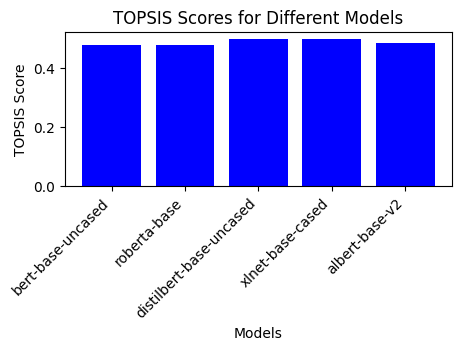

In [41]:
import matplotlib.pyplot as plt


models = ["bert-base-uncased", "roberta-base", "distilbert-base-uncased", "xlnet-base-cased", "albert-base-v2"]
topsis_scores = [0.47856, 0.47979,0.498839 ,0.49788 , 0.48486]

plt.figure(figsize=(5, 2))
plt.bar(models, topsis_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('TOPSIS Score')
plt.title('TOPSIS Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#here I have descibed the plot
plt.show();
